<h1>Exploration des réseaux</h1>

1) Lit les noeuds des réseaux et creer un tableau avec les lignées cellulaire en colonnes la liste des noeuds en ligne
2) met un 0 si le noeud est absent et 1 si le noeud est présent
   

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from upsetplot import plot
import networkx as nx
import near_shortest_undirected
import nearshortest
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings('ignore')
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
nodes=[]
cell_lines=[]
uni_to_name={}
for f in listdir(input_folder):
    cell_lines.append(f)
    node_count=0
    file_name=""
    

    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    
    for line in file:
        uni_to_name[line.strip().split('\t')[0]]=line.strip().split('\t')[1]
        if line.strip().split('\t')[1] not in nodes:
            nodes.append(line.strip().split('\t')[1])
            
    file.close()


print(len(nodes))


df=pd.DataFrame(nodes,columns=['nodes'])
for f in listdir(input_folder):
    current_CL_nodes=[]
    vector=[]
    node_count=0
    file_name=""
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_nodes.tsv"
    file=open(file_name,'r')
    file.readline()
    for line in file:
        current_CL_nodes.append(line.strip().split('\t')[1])
    for node in nodes:
        if node in current_CL_nodes:
            vector.append(1)
        else:
            vector.append(0)
    df[f]=vector

    
    file.close()   

df.set_index('nodes',inplace=True)
print(df)








2834
        XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  ...  \
nodes                                                                  ...   
TP53       1     1     1     1      1      1     1     1      1     1  ...   
EZH2       1     0     1     1      1      0     1     1      1     1  ...   
ATM        1     1     1     1      1      1     1     1      1     1  ...   
NOTCH2     1     1     1     1      1      0     1     1      0     1  ...   
PTCH1      1     0     0     0      0      0     0     1      0     0  ...   
...      ...   ...   ...   ...    ...    ...   ...   ...    ...   ...  ...   
RAD17      0     0     0     0      0      0     0     0      0     0  ...   
RAD1       0     0     0     0      0      0     0     0      0     0  ...   
RAD9A      0     0     0     0      0      0     0     0      0     0  ...   
RAD9B      0     0     0     0      0      0     0     0      0     0  ...   
RHNO1      0     0     0     0      0      0     0     0   

In [39]:
count_node_occ=df.sum(axis=1).sort_values(ascending=False)
print(count_node_occ)
df3=pd.DataFrame(count_node_occ,columns=["occurence"])
print(df3[df3['occurence']==29])
print(len(df3[df3["occurence"]>28]))
print(len(df3[df3["occurence"]==1]))




nodes
MDM2       29
PIK3CB     29
PIK3R3     29
STAT3      29
RAC1       29
           ..
ABCB4       1
HMGCLL1     1
ACSS3       1
PARD6G      1
RHNO1       1
Length: 2834, dtype: int64
        occurence
nodes            
MDM2           29
PIK3CB         29
PIK3R3         29
STAT3          29
RAC1           29
BIRC5          29
PIK3CG         29
AKT1           29
AKT2           29
NRAS           29
PIK3R1         29
PIK3CA         29
CDC42          29
MAPK14         29
MYC            29
15
620


In [42]:
print(df3[df3["occurence"] ==30])
df_reduced=df.drop(df3[df3["occurence"] ==30].index,axis=0)
print(df_reduced)
df_reduced=df_reduced.drop(df3[df3["occurence"] <2].index,axis=0)
print(df_reduced[df_reduced['occurence']==15])

Empty DataFrame
Columns: [occurence]
Index: []
        XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  ...  \
nodes                                                                  ...   
TP53       1     1     1     1      1      1     1     1      1     1  ...   
EZH2       1     0     1     1      1      0     1     1      1     1  ...   
ATM        1     1     1     1      1      1     1     1      1     1  ...   
NOTCH2     1     1     1     1      1      0     1     1      0     1  ...   
PTCH1      1     0     0     0      0      0     0     1      0     0  ...   
...      ...   ...   ...   ...    ...    ...   ...   ...    ...   ...  ...   
RAD17      0     0     0     0      0      0     0     0      0     0  ...   
RAD1       0     0     0     0      0      0     0     0      0     0  ...   
RAD9A      0     0     0     0      0      0     0     0      0     0  ...   
RAD9B      0     0     0     0      0      0     0     0      0     0  ...   
RHNO1      0     

KeyError: 'occurence'

In [4]:
small_df_test=df_reduced[['AMO1','XG16','XG12']]

small_df_test

,AMO1,XG16,XG12
nodes,,,
TP53,1,1,1
EZH2,1,0,0
ATM,1,0,0
NOTCH2,1,0,1
PTCH1,0,0,0
...,...,...,...
SEC24B,1,0,0
NPRL2,1,0,0
Q9BTE2,1,0,0


In [45]:

#a refaire
example = df_reduced.groupby(cell_lines[0:5]).size()


example = df_reduced.groupby(cell_lines).size()
print(example)
plot(df_reduced,max_subset_rank=30)
plt.show()



XG30  XG11  OPM2  XG23  SKMM2  Lopra  XG27  RPMI  MOLP2  XG13  XG26  MOLP8  XG19  XG24  L363  JJN3  XG1  XG28  MM1S  XG2  AMO1  XG16  XG12  XG7  XG6  LP1  XG20  XG5  XG29
0     0     0     0     0      0      0     0     0      0     0     0      0     0     0     0     0    0     0     0    0     0     0     1    1    0    0     1    0        1
                                                                                                                          1     0     0     0    1    0    0     0    0       11
                                                                                                                     1    0     0     0     0    0    0    1     0    0        1
                                                                                                                                                 1    0    0     0    0        1
                                                                                                               1     0   

AttributeError: 'Index' object has no attribute 'levels'

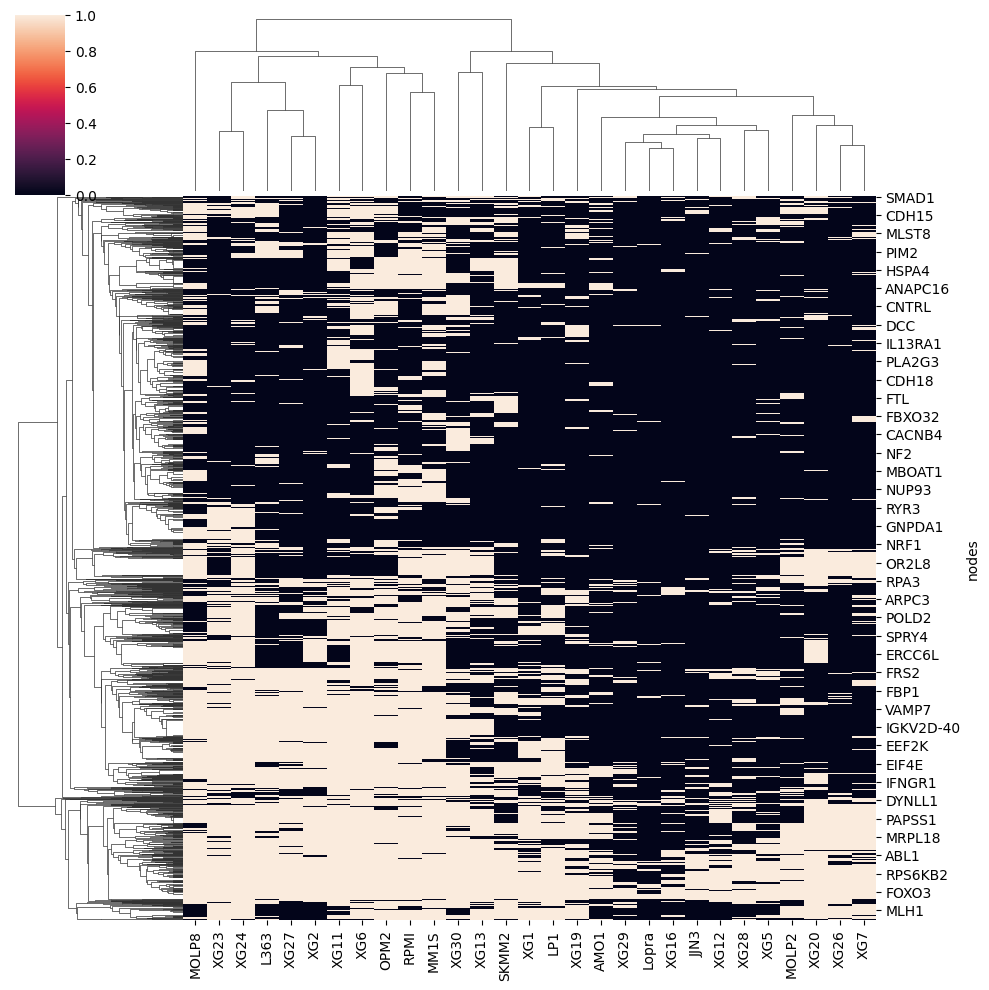

In [6]:
hierachic_cluster=sns.clustermap(df_reduced,xticklabels=True,metric='hamming',col_cluster=True)

In [7]:
df3[df3["occurence"] <2].to_csv('unique_nodes.csv')





In [12]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"

df_betweeness=df.replace(0, np.nan, inplace=False)
df_betweenessbis=df.replace(0, np.nan, inplace=False)
df_outdegree=df.replace(0, np.nan, inplace=False)
df_indegree=df.replace(0, np.nan, inplace=False)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction) #return a digraph
    Gbis=nx.to_undirected(G)
    centrality=nx.betweenness_centrality(G)
    centralitybis=nx.betweenness_centrality(Gbis)
    outdegree=G.out_degree()
    indegree=G.in_degree()
    values=list(centrality.values())
    valuesbis=list(centralitybis.values())
    for key in centrality.keys():
        
        df_betweeness.loc[df_betweeness.index==uni_to_name[key], f]=centrality[key]
        df_outdegree.loc[df_outdegree.index==uni_to_name[key], f]=outdegree[key]
        df_indegree.loc[df_indegree.index==uni_to_name[key], f]=indegree[key]
        df_betweenessbis.loc[df_betweeness.index==uni_to_name[key], f]=centralitybis[key]
    file.close()   






print(max(values)+5/100*max(values))
#print(np.percentile(np.array(values),70,method='higher'))

0.16354165846575752


In [ ]:
hierachic_cluster=sns.clustermap(df_betweeness,xticklabels=True,col_cluster=True)

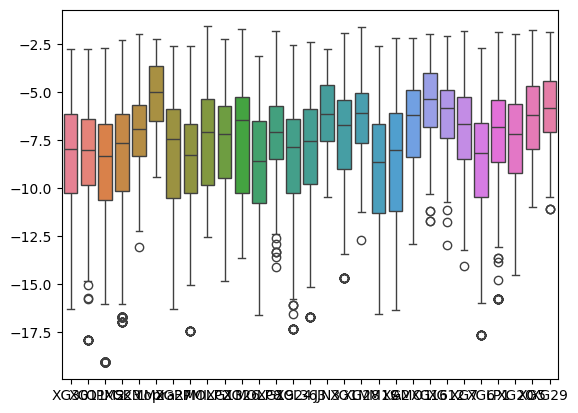

In [10]:
df_betweeness.nlargest(50,columns="Lopra")['Lopra']
df_betweeness[df_betweeness == 0] = np.nan
sns.boxplot(np.log(df_betweeness))
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

XG30
NormaltestResult(statistic=28.65904109493826, pvalue=5.980924193857914e-07)
5.980924193857914e-07
nodes
SUFU      0.0
UBE2A     0.0
UBE2C     0.0
UBE2D4    0.0
UBE2E1    0.0
UBE2E2    0.0
UBE2E3    0.0
UBE2G1    0.0
UBE2G2    0.0
UBE2K     0.0
UBE2S     0.0
TBC1D7    0.0
CDC25C    0.0
XPC       0.0
PIP4P2    0.0
PIP4P1    0.0
RAB5C     0.0
BID       0.0
SLC2A1    0.0
PIDD1     0.0
Name: XG30, dtype: float64
nodes
SUFU      0.0
UBE2A     0.0
UBE2C     0.0
UBE2D4    0.0
UBE2E1    0.0
UBE2E2    0.0
UBE2E3    0.0
UBE2G1    0.0
UBE2G2    0.0
UBE2K     0.0
UBE2S     0.0
TBC1D7    0.0
CDC25C    0.0
XPC       0.0
PIP4P2    0.0
PIP4P1    0.0
RAB5C     0.0
BID       0.0
SLC2A1    0.0
PIDD1     0.0
Name: XG30, dtype: float64
nodes
PIDD1       0.0
AGRN        0.0
CCR1        0.0
CCR3        0.0
CCR5        0.0
XCR1        0.0
CCR2        0.0
CXCR4       0.0
RASSF1      0.0
SPP1        0.0
BNIP3L      0.0
CAMK1D      0.0
CLCA3P      0.0
TTC5        0.0
DYRK2       0.0
SEM1        0.0
ABRAXAS1 

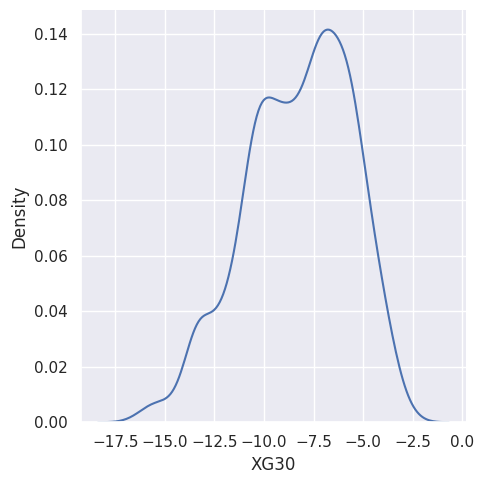

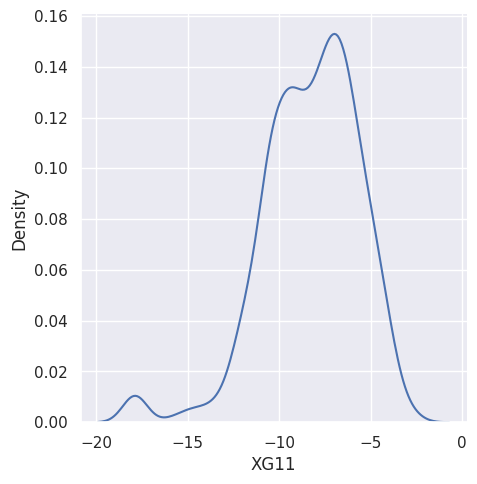

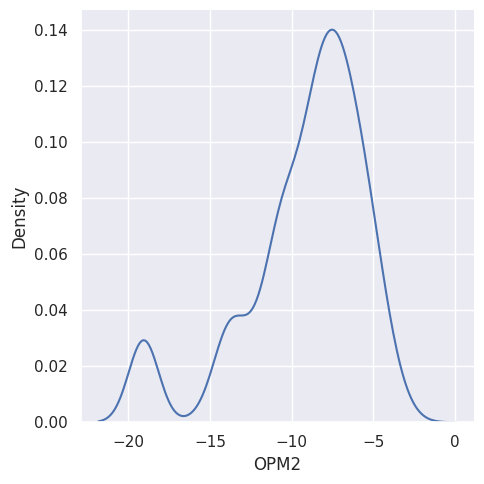

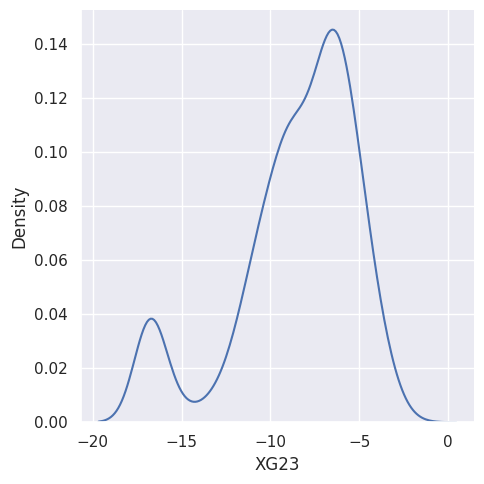

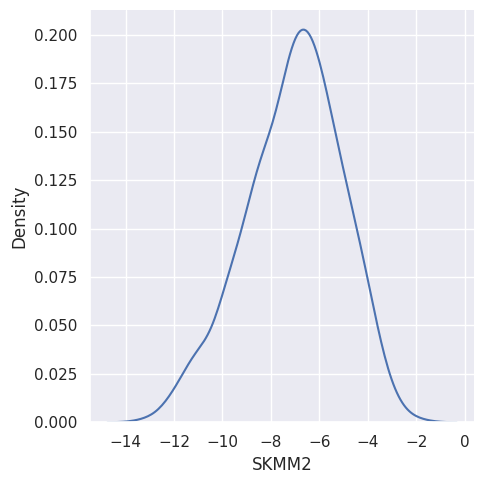

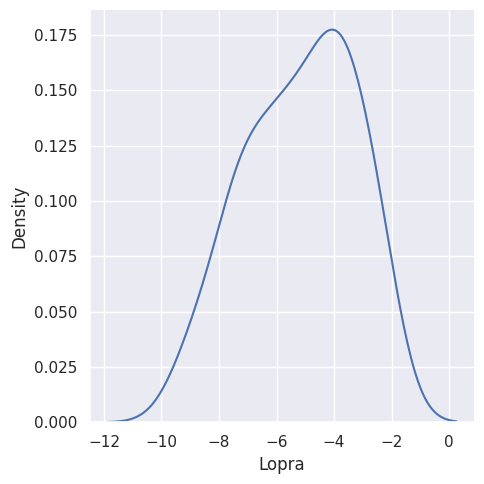

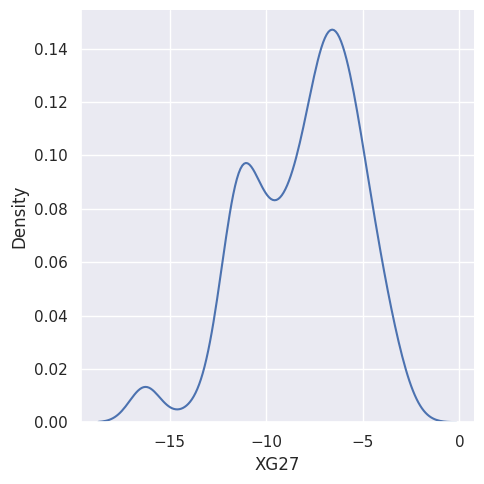

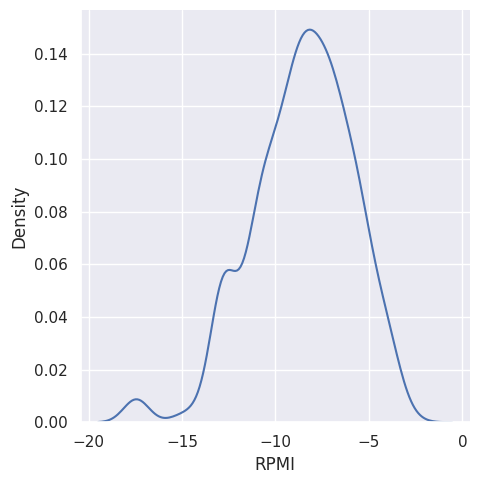

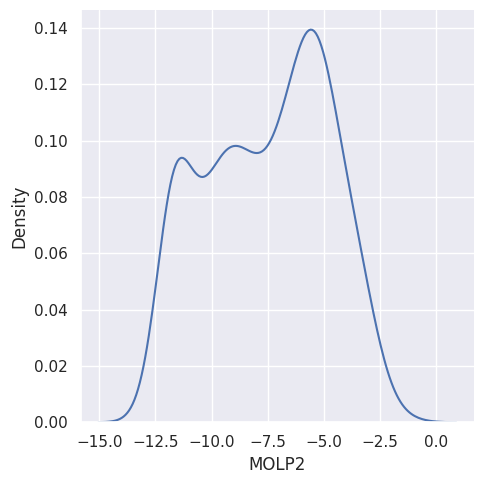

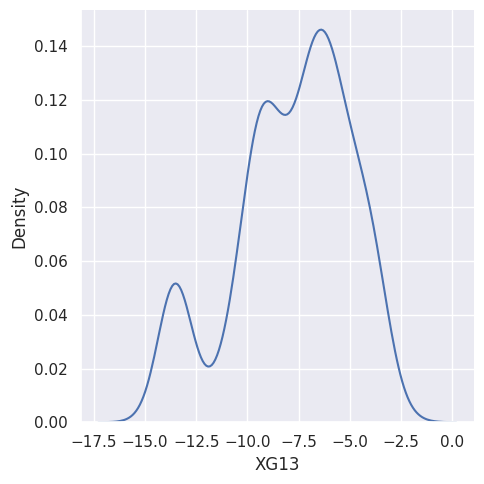

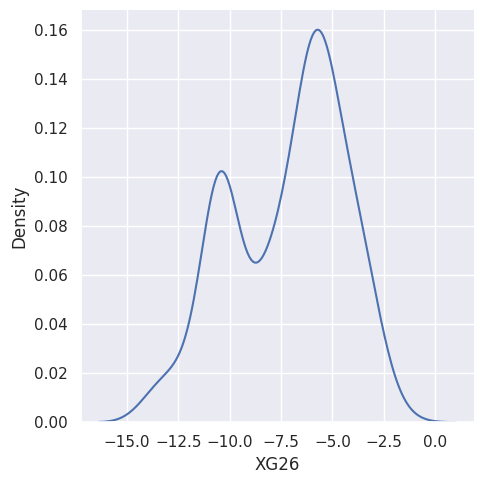

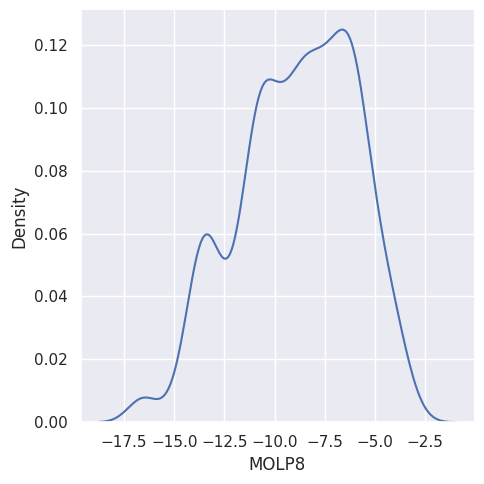

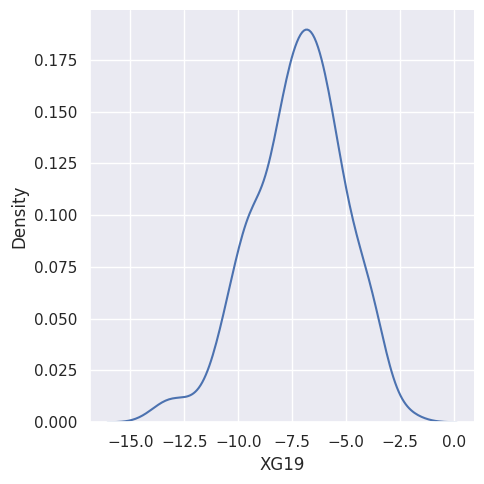

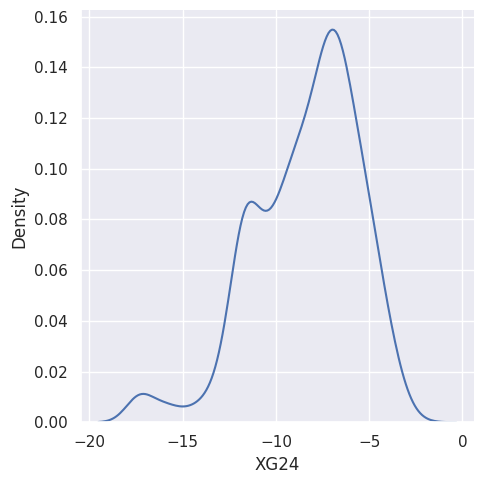

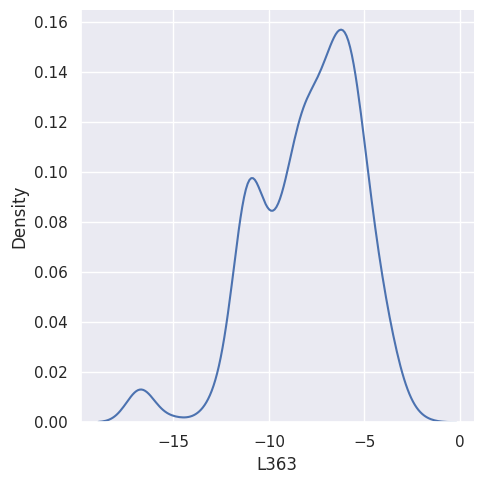

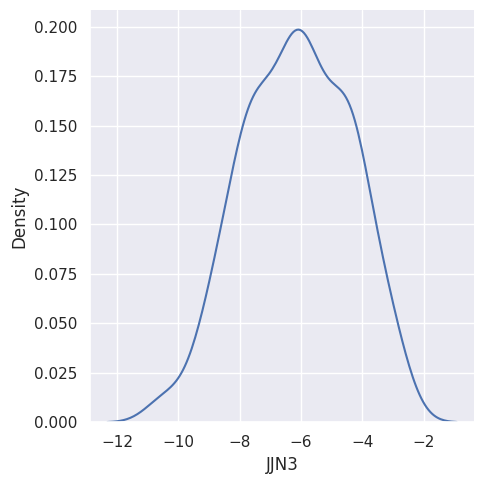

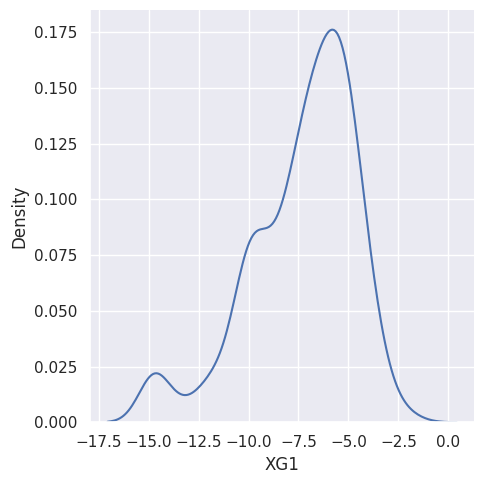

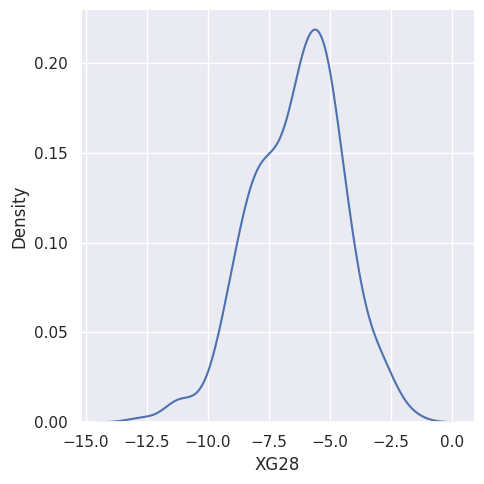

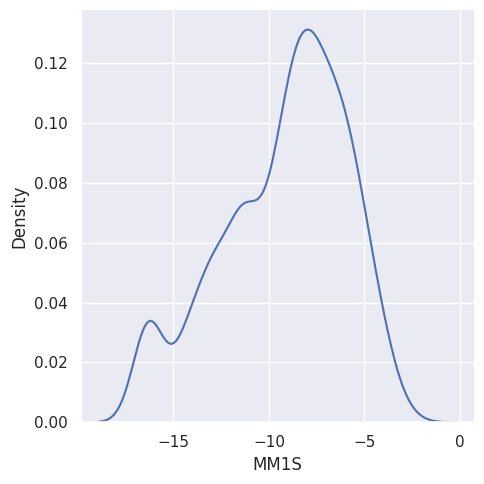

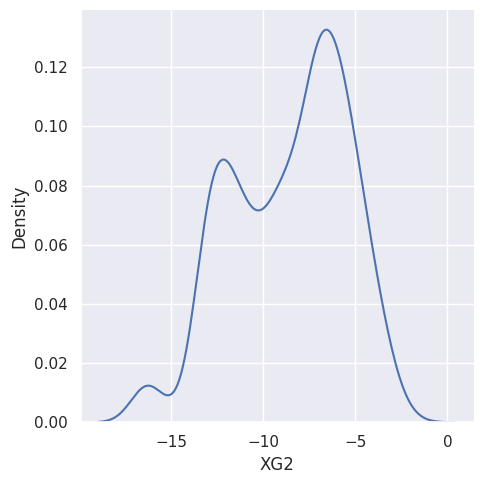

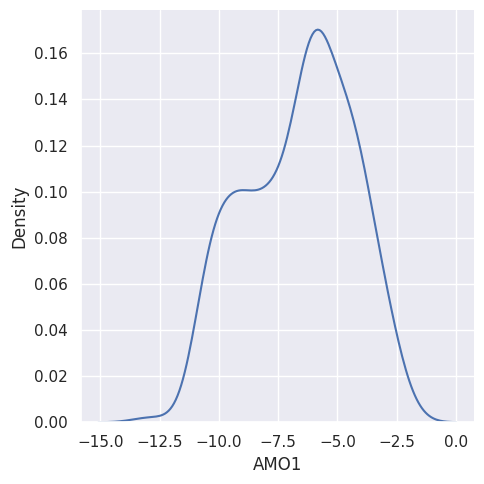

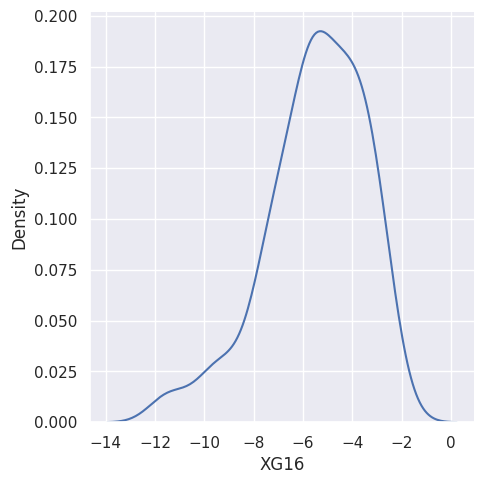

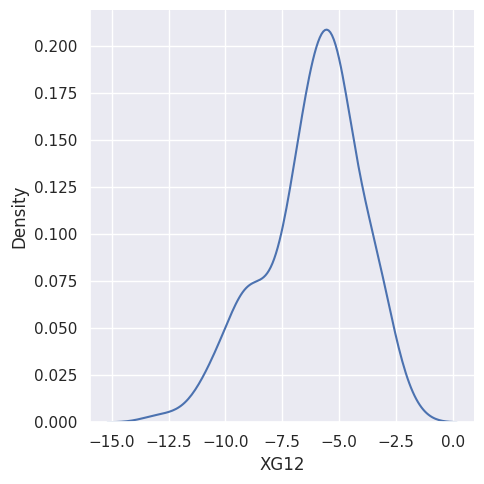

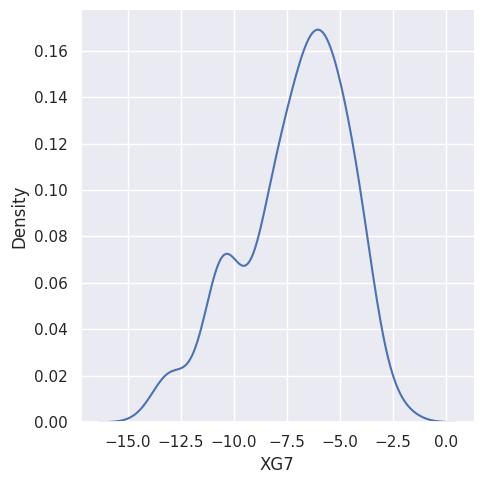

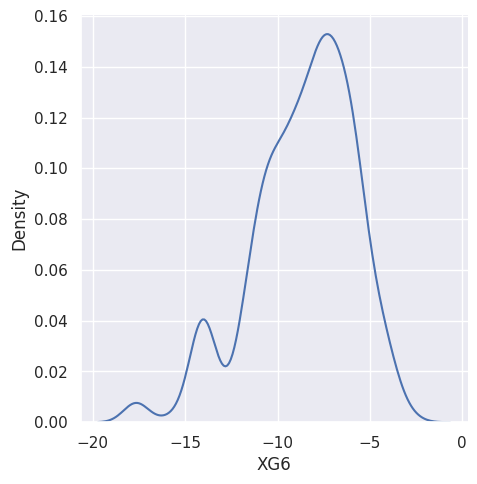

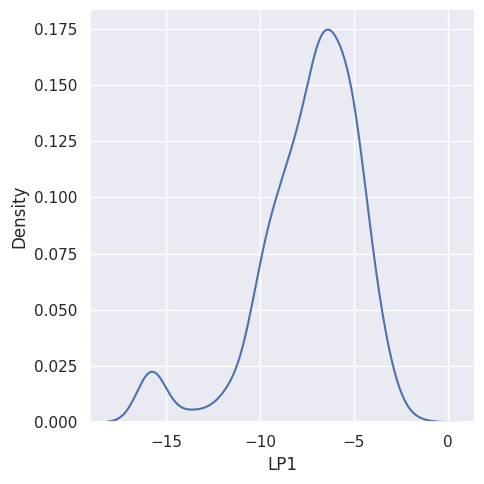

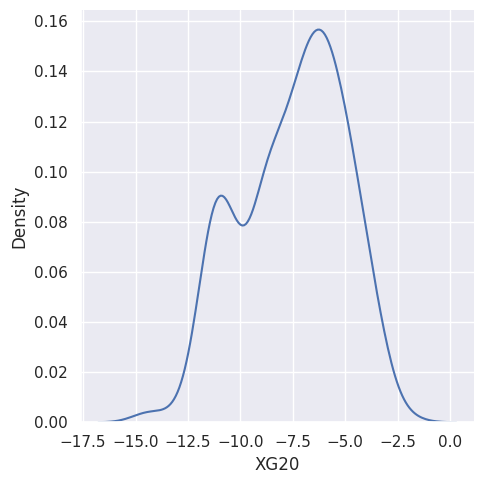

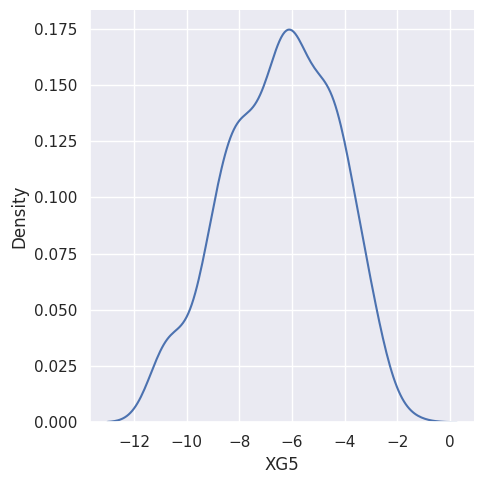

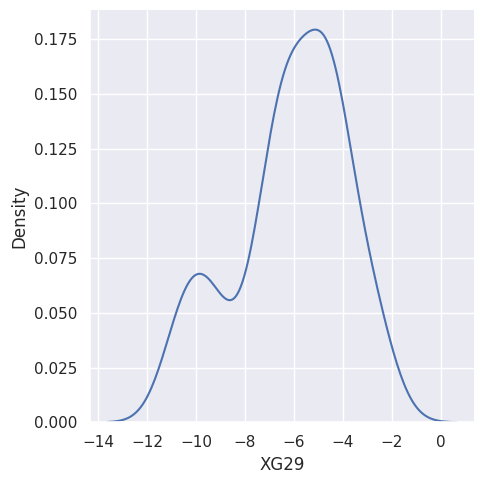

In [34]:
for CL in df_betweeness.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_betweeness[CL]),kind="kde")
    plt.show
    values=np.array(np.log(df_betweeness[CL]))

    
    
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    
    print(stat)
    print(stat.pvalue)

    
    

In [33]:

betweness_set=set()
degree_set=set()
indegree_set=set()
betweness_set=df_betweeness[df_betweeness["XG30"]==0].index
degree_set=df_outdegree[df_outdegree["XG30"]==0].index
indegree_set=df_indegree[df_indegree["XG30"]==0].index
print(len(degree_set))
print(len(indegree_set))
print(len(betweness_set))
print(degree_set.intersection(betweness_set))
print(len(indegree_set.intersection(betweness_set)))


261
39
335
Index(['SUFU', 'UBE2A', 'UBE2C', 'UBE2D4', 'UBE2E1', 'UBE2E2', 'UBE2E3',
       'UBE2G1', 'UBE2G2', 'UBE2K',
       ...
       'PICK1', 'ZNF274', 'IRF5', 'IRF7', 'MAP4K2', 'MAP4K3', 'DNM1L',
       'NFKBIB', 'NFKBIE', 'IRF3'],
      dtype='object', name='nodes', length=261)
39


In [ ]:
df_betweeness['XG30'].sort_values()

In [ ]:
input_folder="reconstruct_200324_cyto_rnaseq64_all_pathways/"
df_degree=df.astype(float)
for f in listdir(input_folder):
    file_name=input_folder+f+"/all_targets/"+f+"_shortest_all_targets.txt_edges.tsv"
    interaction=near_shortest_undirected.load_full_graph_unweihted(file_name)
    G=near_shortest_undirected.load_interactions_unweighted (interaction)
    
    degrees=nx.degree(G)
    
    for degree in degrees:
        
        df_degree.loc[df_degree.index==uni_to_name[degree[0]], f]=degree[1]

    file.close()   

In [ ]:
df_degree.nlargest(50,columns="Lopra")['Lopra']
df_degree[df_degree == 0] = np.nan
sns.set(rc={'figure.figsize':(15,15)})
sns.boxplot(np.log(df_degree))

plt.show()

In [ ]:
for CL in df_degree.columns:
    #np.log(df_betweeness[CL]).hist()
    sns.displot(np.log(df_degree[CL]),kind="kde")
    values=np.array(np.log(df_degree[CL]))
    print(CL)
    stat=scipy.stats.normaltest(values,nan_policy='omit')
    print(stat)
    print(stat.pvalue)